In [61]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [62]:
df = sns.load_dataset('titanic')

In [63]:
df[:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Missing values

`np.nan` `pd.isna` `pd.notna`

Handled usually automatically by pandas

In [98]:
# Missing values are often encoded as the special `NaN` value
np.nan

nan

In [65]:
# it is actually of type float
type(np.nan)

float

In [99]:
# The value compares negatively with almost everything. It is a bit of an odd-ball
np.nan >= 0, np.nan <= 0, np.nan == np.nan

(False, False, False)

In [94]:
# Looking at a column with NaN values (df.deck is equivalent in this case)
df['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
5      NaN
6        E
7      NaN
8      NaN
9      NaN
10       G
11       C
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21       D
22     NaN
23       A
24     NaN
25     NaN
26     NaN
27       C
28     NaN
29     NaN
      ... 
861    NaN
862      D
863    NaN
864    NaN
865    NaN
866    NaN
867      A
868    NaN
869    NaN
870    NaN
871      D
872      B
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879      C
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

**IMPORTANT NOTE**: 
- [`pd.notna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.notna.html) is a *function* from the `pandas` package which can be applied directly to a value, or a Series, or a DataFrame. The syntax is for instance `pd.notna(my_column)`. The output depends on the input.
- [`pd.Series.notna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notna.html) is a *method* from the `pd.Series` object. So if you have a column series `my_column`, it can be called with `my_column.notna()`. The output is a `pd.Series` of the same size.
- [`pd.DataFrame.notna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html) is a *method* from the `pd.DataFrame` object. So if you have a dataframe `my_df`, it can be called with `my_df.notna()`. The output is a `pd.DataFrame` of the same size.
- This is not always the case, it's just part of pandas (and numpy) design to often have a function and a method version of the same thing.

In [70]:
# Testing non available values, all these lines are equivalent
df.deck.notna()
pd.notna(df.deck)
df['deck'].notna()
pd.notna(df['deck'])

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7      False
8      False
9      False
10      True
11      True
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23      True
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
861    False
862     True
863    False
864    False
865    False
866    False
867     True
868    False
869    False
870    False
871     True
872     True
873    False
874    False
875    False
876    False
877    False
878    False
879     True
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: deck, Length: 891, dtype: bool

In [72]:
# Many operations handle missing values automatically, like computing the average fare
df.fare.mean()

32.204207968574636

In [71]:
# Filtering the original dataframe by only keeping the rows where the deck field is available
df[df.deck.notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


The following line might be a bit complex, so it is then split into more digestible chunks.

The following block is equivalent to the above line:
1. Access a column (type: `pd.Series`)
2. Check for every value if it is available (type: `pd.Series` with boolean values inside)
3. Takes the average of the last result. For a boolean column, this means the proportion of `True` values among all the values.

In [100]:
# Computing the proportion of records where the `deck` information is available
df.deck.notna().mean()

0.22783389450056116

In [101]:
my_column = df.deck  # or df['deck'] equivalently
notna_column = my_column.notna()
notna_column.mean()

0.22783389450056116

# Parsing values

In [74]:
def country_of_origin(city_name):
    if city_name == 'Cherbourg':
        return "France"
    if city_name == 'Southampton':
        return "England"

# Example of generating a column from another one
# Here we take the column about the city of embarking and create a new column representing the country of origin
df.embark_town.apply(country_of_origin)

0      England
1       France
2      England
3      England
4      England
5         None
6      England
7      England
8      England
9       France
10     England
11     England
12     England
13     England
14     England
15     England
16        None
17     England
18     England
19      France
20     England
21     England
22        None
23     England
24     England
25     England
26      France
27     England
28        None
29     England
        ...   
861    England
862    England
863    England
864    England
865    England
866     France
867    England
868    England
869    England
870    England
871    England
872    England
873    England
874     France
875     France
876    England
877    England
878    England
879     France
880    England
881    England
882    England
883    England
884    England
885       None
886    England
887    England
888    England
889     France
890       None
Name: embark_town, Length: 891, dtype: object

In [76]:
# Takes a row, and returns if it is an adult male or not
def is_adult_male(row):
    return (row.age >= 18 or pd.isna(row.age)) and row.sex == 'male'

# Here we apply the function to the complete dataframe, on a row-per-row basis
# the function is called with each row individually, generating a new column
df.apply(is_adult_male, axis=1)

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7      False
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869    False
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886     True
887    False
888    False
889     True
890     True
Length: 891, dtype: bool

In [50]:
def is_adult_male(row):
    return (row.age >= 18 or pd.isna(row.age)) and row.sex == 'male'

def process_row(row):
    return pd.Series({'high_fare': row.fare> 50, 'adult_male': is_adult_male(row)})

# Here each row is processed and generates two values (i.e another row)
# The result is then two columns, so it is a DataFrame
df.apply(process_row, axis=1)

,high_fare,adult_male
0,False,True
1,True,False
2,False,False
3,True,False
4,False,True
5,False,True
6,True,True
7,False,False
8,False,False
9,False,False


# Groupby and Aggregation

In [102]:
# The intermediate state of a GroupBy is not readable directly
# Rows are grouped based on having the same value for the column used for grouping
# Here the command is for grouping the values based on the 'deck' 
df.groupby('deck')

In [81]:
# The grouped values needs to be aggregated in a single one
# Here we take our grouped rows, only consider the "fare" column, and take the 'max' of each sub-group
df.groupby('deck').fare.max()

deck
A     81.8583
B    512.3292
C    263.0000
D    113.2750
E    134.5000
F     39.0000
G     16.7000
Name: fare, dtype: float64

In [110]:
# Another aggregation function for the subgroups can be used
# Or looking at other columns
print(df.groupby('deck').fare.mean())
print(df.groupby('deck').age.median())

deck
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
Name: fare, dtype: float64
deck
A    44.0
B    33.0
C    36.0
D    37.0
E    39.0
F    24.0
G    14.0
Name: age, dtype: float64


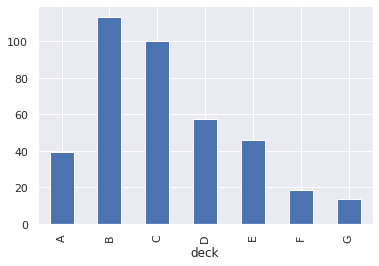

In [111]:
# Remember that Series can be plotted directly,
# since the previous outputs are of that type we can direclty plot the results
df.groupby('deck').fare.mean().plot(kind='bar')

# Sampling bias and other biases

In [29]:
# Looking at the proportion of missing values for the deck parameter
# Most values are missing, it might not invalidate our results, but we should keep it in mind
pd.isna(df.deck).mean()

0.7721661054994389

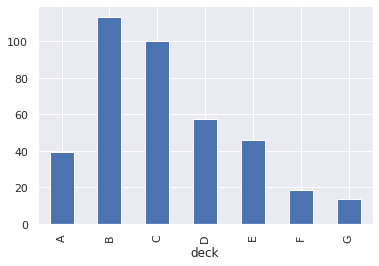

In [112]:
# The price of ticket seems more expensive on deck B than deck C, looking at the average price
df.groupby('deck').fare.mean().plot(kind='bar')

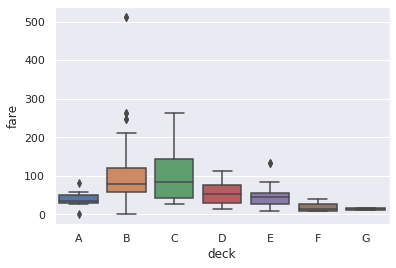

In [23]:
# But if we look at the whole distribution, it is not clear, it is mainly due to a couple very high values
# High-end suites maybe?
sns.boxplot('deck', 'fare', data=df)

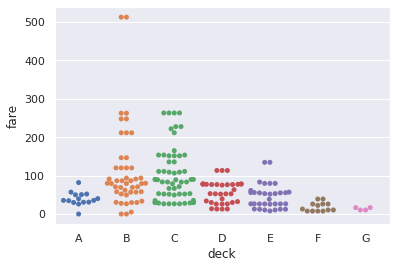

In [113]:
sns.swarmplot('deck', 'fare', data=df)